In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [7]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Creating Dummy Variables for categorical variables

In [8]:
df = pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [9]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.049855     0.017365   0.026885  0.100025   
RestingECG_Normal -0.230566  -0.116851    -0.038470  -0.093028  0.023801   
RestingECG_S

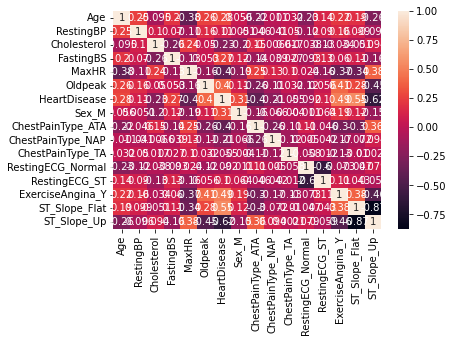

In [10]:
corr_matrix = df.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

K Means Clustering Analyses

In [11]:
scaler = StandardScaler()
df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1


In [12]:
#Splitting Dataset
X_train, X_test, Y_train, Y_test = train_test_split(df,df['HeartDisease'],test_size=0.2, random_state=0)

Text(0, 0.5, 'Error Rate')

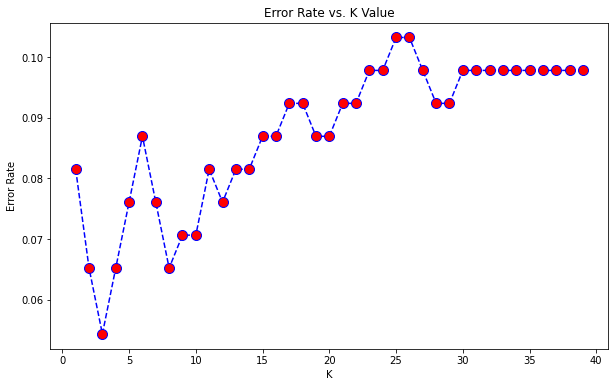

In [13]:
#Elbow Method to optimise K value
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,Y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
#Modeling
KNN_model = KNeighborsClassifier(n_neighbors=3)

KNN_model.fit(X_train,Y_train)
KNN_predictions = KNN_model.predict(X_test)

print(confusion_matrix(Y_test,KNN_predictions))
print('\n')
print(classification_report(Y_test,KNN_predictions))

[[ 70   7]
 [  3 104]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.94      0.97      0.95       107

    accuracy                           0.95       184
   macro avg       0.95      0.94      0.94       184
weighted avg       0.95      0.95      0.95       184



Optimizin KNN Model with Simple Feature Engineering

In [15]:
#Remove variables with low correlation with Dependent Variable

df.drop(['RestingBP','ChestPainType_TA','RestingECG_Normal'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   Cholesterol        918 non-null    float64
 2   FastingBS          918 non-null    int64  
 3   MaxHR              918 non-null    float64
 4   Oldpeak            918 non-null    float64
 5   HeartDisease       918 non-null    int64  
 6   Sex_M              918 non-null    uint8  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   RestingECG_ST      918 non-null    uint8  
 10  ExerciseAngina_Y   918 non-null    uint8  
 11  ST_Slope_Flat      918 non-null    uint8  
 12  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 49.4 KB


Redo All Processes with new dataframe

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df,df['HeartDisease'],test_size=0.2, random_state=0)

Text(0, 0.5, 'Error Rate')

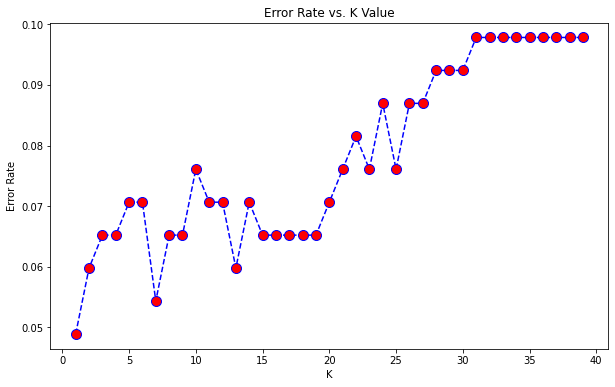

In [17]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,Y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
KNN_model = KNeighborsClassifier(n_neighbors=1)

KNN_model.fit(X_train,Y_train)
KNN_predictions = KNN_model.predict(X_test)

print(confusion_matrix(Y_test,KNN_predictions))
print('\n')
print(classification_report(Y_test,KNN_predictions))

[[ 72   5]
 [  4 103]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.95      0.96      0.96       107

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184

